<a href="https://colab.research.google.com/drive/1FU6CylpjvXYrlCsckSFI7Fc-JCcX9n-H?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Rafael Fernandes de Oliveira

### Disciplina - Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes

Foram realizadas análises de energia usando 12 formatos de edifícios diferentes simulados no software Ecotect. Os edifícios diferem no que diz respeito à área envidraçada, à distribuição da área envidraçada e à orientação, entre outros parâmetros. Foram simuladas várias configurações em função das características acima mencionadas para obter 768 formas de construção. O conjunto de dados compreende 768 amostras e 8 características, visando prever duas respostas com valor real, sendo a carga necessária para aquecimento e a carga necessária para resfriamento visando determinar a eficiência energética do edificio.

O conjunto de dados contém oito atributos (ou características, denotados por X1...X8) e duas respostas (ou resultados, denotados por y1 e y2).

Descrição de Cada Coluna:

- X1 = Relative Compactness (Compacidade relativa) -  índice utilizado para determinar o grau de compactação de um material granular.
- X2 = Surface Area (Área de Superfície).
- X3 = Wall Area (Área da Parede).
- X4 = Roof Area (Área do telhado).
- X5 = Overall Height (Altura total).
- X6 = 	Orientation (Orientação).
- X7 = Glazing Area (Área de Envidraçamento).
- X8 = Glazing Area Distribution (Distribuição da área envidraçada).
- y1 = Heating Load (Carga de aquecimento)
- y2 = Cooling Load (Carga de resfriamento)

O objetivo é usar as oito características para prever cada uma das duas respostas, sendo "Carga de aquecimento" e "Carga de resfriamento" e assim analisar a eficiência energética do edificio entre (baixa, média, alta).

## Configuração do ambiente

In [6]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR


## Carga do Dataset


In [7]:
# Informa a URL de importação do dataset
url = "../data/ENB2012_data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Análise do Dataset


In [ ]:
# Remover linhas com valores nulos
dataset = dataset.dropna()

# Exibir informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## Separação em conjuntos de treino e teste

In [ ]:
# Codificando as variáveis categóricas em uma cópia do dataset
dataset_encoded = dataset.copy()  # Faz uma cópia do dataset original
label_encoders = {}

# Codificando as variáveis categóricas
for column in dataset_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_encoded[column] = le.fit_transform(dataset_encoded[column])
    label_encoders[column] = le

# Separando características (X) e alvos (y1 e y2)
X = dataset.drop(columns=['Y1', 'Y2'])
y1 = dataset['Y1']
y2 = dataset['Y2']

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Divisão em conjuntos de treino e teste
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=test_size, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=test_size, random_state=seed)

# Verificar tamanhos dos conjuntos
print("Total de amostras no conjunto de treino:", X_train.shape[0])
print("Total de amostras no conjunto de teste:", X_test.shape[0])

print("\nTabelas")
print(X_train)
print(y1_train)
print(y2_train)


Total de amostras no conjunto de treino: 614
Total de amostras no conjunto de teste: 154

Tabelas
       X1     X2     X3      X4   X5  X6    X7  X8
289  0.98  514.5  294.0  110.25  7.0   3  0.25   1
328  0.64  784.0  343.0  220.50  3.5   2  0.25   1
394  0.86  588.0  294.0  147.00  7.0   4  0.25   3
321  0.69  735.0  294.0  220.50  3.5   3  0.25   1
326  0.66  759.5  318.5  220.50  3.5   4  0.25   1
..    ...    ...    ...     ...  ...  ..   ...  ..
579  0.98  514.5  294.0  110.25  7.0   5  0.40   2
502  0.76  661.5  416.5  122.50  7.0   4  0.25   5
537  0.86  588.0  294.0  147.00  7.0   3  0.40   1
196  0.90  563.5  318.5  122.50  7.0   2  0.10   4
175  0.71  710.5  269.5  220.50  3.5   5  0.10   3

[614 rows x 8 columns]
289    28.15
328    17.50
394    29.43
321    12.93
326    13.17
       ...  
579    32.72
502    36.06
537    32.39
196    29.06
175    10.70
Name: Y1, Length: 614, dtype: float64
289    29.79
328    21.13
394    28.38
321    15.63
326    16.39
       ...  
579    

## Modelagem e Inferência


In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.random.seed(7) # definindo uma semente global

# Definindo os parâmetros do classificador base para ensembles
base = DecisionTreeRegressor()
num_trees = 100
max_features = 5

# Criando os modelos, incluindo ensembles
models = {
    # adicionando modelos na lista
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'CART': DecisionTreeRegressor(),
    'SVR': SVR(),
    # adicionando ensembles na lista
    'Bagging': BaggingRegressor(estimator=base, n_estimators=num_trees),
    'RF': RandomForestRegressor(n_estimators=num_trees, max_features=max_features),
    'ET': ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features),
    'Ada': AdaBoostRegressor(n_estimators=num_trees),
    'GB': GradientBoostingRegressor(n_estimators=num_trees),
    'Voting': VotingRegressor(estimators=[
        ('linear', LinearRegression()),
        ('cart', DecisionTreeRegressor()),
        ('svr', SVR())
    ])
}

# Avaliando os modelos para Y1
print("Avaliação dos modelos para Y1:")
results_y1 = {}
r2_scores_y1 = {}
predictions_y1 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y1_train)
    predictions = model.predict(X_test_scaled)
    predictions_y1[name] = predictions
    mae = mean_absolute_error(y1_test, predictions)
    mse = mean_squared_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions)
    r2_scores_y1[name] = r2
    results_y1[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    print(f'{name} para Y1: MAE = {mae:.2f}, MSE = {mse:.2f}, R² = {r2:.2f}')

# Exibindo os melhores modelos baseados no R² para Y1
print("\nMelhores modelos para Y1 (baseados no R²):")
best_models_y1 = sorted(r2_scores_y1.items(), key=lambda x: x[1], reverse=True)
for name, r2 in best_models_y1:
    print(f'{name}: R² = {r2:.4f}')

# Avaliando os modelos para Y2
print("\nAvaliação dos modelos para Y1:")
results_y2 = {}
r2_scores_y2 = {}
predictions_y2 = {}
for name, model in models.items():
    model.fit(X_train_scaled, y2_train)
    predictions = model.predict(X_test_scaled)
    predictions_y2[name] = predictions
    mae = mean_absolute_error(y2_test, predictions)
    mse = mean_squared_error(y2_test, predictions)
    r2 = r2_score(y2_test, predictions)
    r2_scores_y2[name] = r2
    results_y2[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    print(f'{name} para Y2: MAE = {mae:.2f}, MSE = {mse:.2f}, R² = {r2:.2f}')

# Exibindo os melhores modelos baseados no R² para Y2
print("\nMelhores modelos para Y2 (baseados no R²):")
best_models_y2 = sorted(r2_scores_y2.items(), key=lambda x: x[1], reverse=True)
for name, r2 in best_models_y2:
    print(f'{name}: R² = {r2:.4f}')



Avaliação dos modelos para Y1:
LR para Y1: MAE = 2.08, MSE = 8.63, R² = 0.91
KNN para Y1: MAE = 1.50, MSE = 5.30, R² = 0.95
CART para Y1: MAE = 0.36, MSE = 0.33, R² = 1.00
SVR para Y1: MAE = 1.80, MSE = 7.17, R² = 0.93
Bagging para Y1: MAE = 0.31, MSE = 0.21, R² = 1.00
RF para Y1: MAE = 0.30, MSE = 0.20, R² = 1.00
ET para Y1: MAE = 0.30, MSE = 0.19, R² = 1.00
Ada para Y1: MAE = 1.60, MSE = 3.96, R² = 0.96
GB para Y1: MAE = 0.33, MSE = 0.23, R² = 1.00
Voting para Y1: MAE = 1.26, MSE = 3.37, R² = 0.97

Melhores modelos para Y1 (baseados no R²):
ET: R² = 0.9981
RF: R² = 0.9980
Bagging: R² = 0.9980
GB: R² = 0.9978
CART: R² = 0.9968
Voting: R² = 0.9668
Ada: R² = 0.9610
KNN: R² = 0.9477
SVR: R² = 0.9293
LR: R² = 0.9149

Avaliação dos modelos para Y1:
LR para Y2: MAE = 2.24, MSE = 10.46, R² = 0.89
KNN para Y2: MAE = 1.82, MSE = 6.96, R² = 0.92
CART para Y2: MAE = 1.29, MSE = 5.62, R² = 0.94
SVR para Y2: MAE = 2.09, MSE = 9.97, R² = 0.89
Bagging para Y2: MAE = 1.03, MSE = 2.70, R² = 0.97
RF pa

## Classificação dos Resultados

In [ ]:
# Criar uma tabela com os resultados
final_results = pd.DataFrame({
    'Y1 Real': y1_test,
    'Y1 Predito': predictions_y1['GB'],  # Modelo com melhor avaliação
    'Y2 Real': y2_test,
    'Y2 Predito': predictions_y2['GB']   # Modelo com melhor avaliação
})

# Classificação das predições em categorias
def categorize(value):
    if value >= 30:
        return 'Alta'
    elif value >= 15:
        return 'Média'
    else:
        return 'Baixa'

# Aplicar a classificação
final_results['Y1 Cat. Real'] = final_results['Y1 Real'].apply(categorize)
final_results['Y1 Cat. Predito'] = final_results['Y1 Predito'].apply(categorize)
final_results['Y2 Cat. Real'] = final_results['Y2 Real'].apply(categorize)
final_results['Y2 Cat. Predito'] = final_results['Y2 Predito'].apply(categorize)

# Exibir a tabela com os resultados
print("\nTabela com os resultados:")
print(final_results.head())  # Exibe as primeiras linhas da tabela

# Calcular percentual de erro para Y1
y1_errors = final_results['Y1 Cat. Real'] != final_results['Y1 Cat. Predito']
y1_error_percentage = (y1_errors.sum() / len(y1_errors)) * 100

# Calcular percentual de erro para Y2
y2_errors = final_results['Y2 Cat. Real'] != final_results['Y2 Cat. Predito']
y2_error_percentage = (y2_errors.sum() / len(y2_errors)) * 100

# Exibir percentuais de erro
print(f'\nPercentual de erro para Y1: {y1_error_percentage:.2f}%')
print(f'Percentual de erro para Y2: {y2_error_percentage:.2f}%')



Tabela com os resultados:
     Y1 Real  Y1 Predito  Y2 Real  Y2 Predito Y1 Cat. Real Y1 Cat. Predito  \
353    40.19   39.090984    37.41   40.747612         Alta            Alta   
236    12.85   12.755443    14.37   14.055738        Baixa           Baixa   
323    12.72   12.645946    15.78   15.740464        Baixa           Baixa   
98     24.13   24.485191    26.13   26.056883        Média           Média   
701    14.70   14.197616    17.20   16.661311        Baixa           Baixa   

    Y2 Cat. Real Y2 Cat. Predito  
353         Alta            Alta  
236        Baixa           Baixa  
323        Média           Média  
98         Média           Média  
701        Média           Média  

Percentual de erro para Y1: 0.65%
Percentual de erro para Y2: 9.74%


## Avaliação do modelos


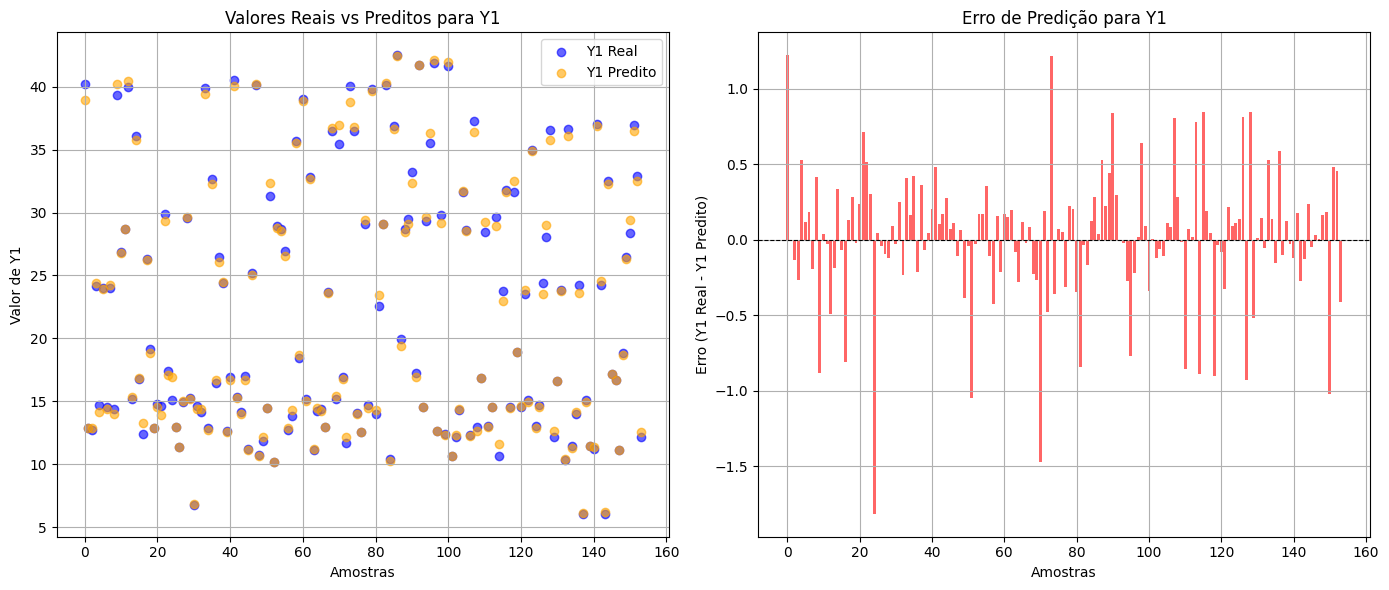

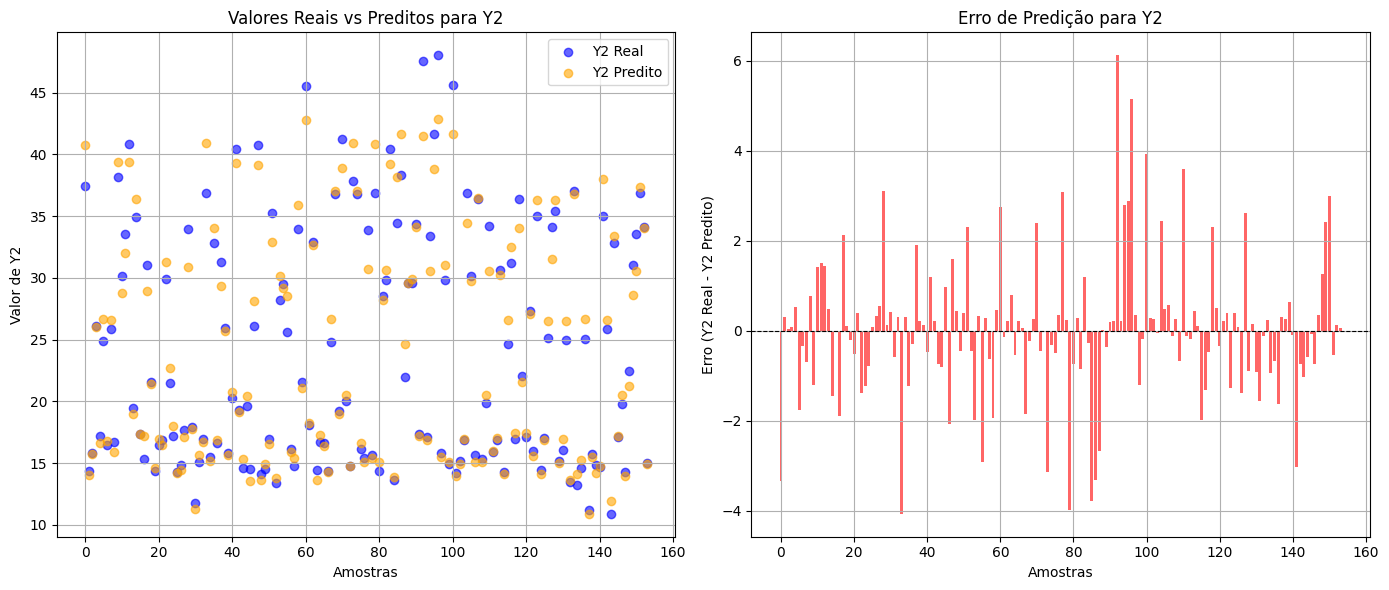

In [ ]:
# 1. Gráfico para Y1
plt.figure(figsize=(14, 6))

# Valores reais
plt.subplot(1, 2, 1)
plt.scatter(range(len(y1_test)), y1_test, color='blue', label='Y1 Real', alpha=0.6)
plt.scatter(range(len(y1_test)), final_results['Y1 Predito'], color='orange', label='Y1 Predito', alpha=0.6)
plt.title('Valores Reais vs Preditos para Y1')
plt.xlabel('Amostras')
plt.ylabel('Valor de Y1')
plt.legend()
plt.grid()

# Erro de predição
plt.subplot(1, 2, 2)
errors_y1 = y1_test - final_results['Y1 Predito']
plt.bar(range(len(errors_y1)), errors_y1, color='red', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Erro de Predição para Y1')
plt.xlabel('Amostras')
plt.ylabel('Erro (Y1 Real - Y1 Predito)')
plt.grid()

plt.tight_layout()
plt.show()

# 2. Gráfico para Y2 (similar)
plt.figure(figsize=(14, 6))

# Valores reais
plt.subplot(1, 2, 1)
plt.scatter(range(len(y2_test)), y2_test, color='blue', label='Y2 Real', alpha=0.6)
plt.scatter(range(len(y2_test)), final_results['Y2 Predito'], color='orange', label='Y2 Predito', alpha=0.6)
plt.title('Valores Reais vs Preditos para Y2')
plt.xlabel('Amostras')
plt.ylabel('Valor de Y2')
plt.legend()
plt.grid()

# Erro de predição
plt.subplot(1, 2, 2)
errors_y2 = y2_test - final_results['Y2 Predito']
plt.bar(range(len(errors_y2)), errors_y2, color='red', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Erro de Predição para Y2')
plt.xlabel('Amostras')
plt.ylabel('Erro (Y2 Real - Y2 Predito)')
plt.grid()

plt.tight_layout()
plt.show()

## Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [ ]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Definindo os parâmetros do classificador base ensembles
base = DecisionTreeRegressor()
num_trees = 100
max_features = 5

# Criando os modelos, incluindo ensembles
models = {
    # adicionando modelos na lista
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'CART': DecisionTreeRegressor(),
    'SVR': SVR(),
    # adicionando ensembles na lista
    'Bagging': BaggingRegressor(estimator=base, n_estimators=num_trees),
    'RF': RandomForestRegressor(n_estimators=num_trees, max_features=max_features),
    'ET': ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features),
    'Ada': AdaBoostRegressor(n_estimators=num_trees),
    'GB': GradientBoostingRegressor(n_estimators=num_trees),
    'Voting': VotingRegressor(estimators=[
        ('linear', LinearRegression()),
        ('cart', DecisionTreeRegressor()),
        ('svr', SVR())
    ])
}

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models.items():
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    }
}

# Executando os pipelines
scoring = 'neg_mean_squared_error'  # ou qualquer métrica desejada
kfold = 5

# Avaliando para Y1
results = []
names = []
print("\nAvaliação para Y1:")
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y1_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print("\nAjustando modelo para Y1:")
best_score = float('-inf')
best_model_name = ""
best_params = {}
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y1_train)

    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

    # Verifica se este modelo tem o melhor para Y1 score até agora
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model_name = name
        best_params = grid.best_params_

# Encontrar o modelo com o melhor score para Y1
best_index_y1 = np.argmax([result.mean() for result in results[len(pipelines) // 2:]])  # Modelos para Y1
best_model_y1 = names[len(pipelines) // 2 + best_index_y1]
best_score_y1_score = results[len(pipelines) // 2 + best_index_y1].mean()
print(f"\nMelhor modelo para Y1 sem ajustes: {best_model_y1} com score de {best_score_y1_score:.3f}")
print(f"Melhor modelo para Y1 com ajustes: {best_model_name} com score de {best_score:.3f} usando {best_params}")

# Avaliando para Y2
results = []
names = []
print("\nAvaliação para Y2:")
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y2_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print("\nAjustando modelo para Y2:")
best_score = float('-inf')
best_model_name = ""
best_params = {}
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y2_train)

    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

    # Verifica se este modelo tem o melhor para Y2 score até agora
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model_name = name
        best_params = grid.best_params_

# Encontrar o modelo com o melhor score para Y2
best_index_y2 = np.argmax([result.mean() for result in results[len(pipelines) // 2:]])  # Modelos para Y1
best_model_y2 = names[len(pipelines) // 2 + best_index_y2]
best_score_y2_score = results[len(pipelines) // 2 + best_index_y2].mean()
print(f"\nMelhor modelo para Y2 sem ajustes: {best_model_y2} com score de {best_score_y2_score:.3f}")
print(f"Melhor modelo para Y2 com ajustes: {best_model_name} com score de {best_score:.3f} usando {best_params}")




Avaliação para Y1:
LR-orig: -8.716 (0.768)
LR-padr: -8.659 (0.726)
LR-norm: -8.802 (0.873)
KNN-orig: -6.423 (1.229)
KNN-padr: -5.485 (0.518)
KNN-norm: -7.463 (0.557)
CART-orig: -0.362 (0.043)
CART-padr: -0.358 (0.051)
CART-norm: -0.372 (0.048)
SVR-orig: -32.827 (4.138)
SVR-padr: -8.353 (1.014)
SVR-norm: -8.398 (0.936)
Bagging-orig: -0.259 (0.052)
Bagging-padr: -0.260 (0.062)
Bagging-norm: -0.264 (0.054)
RF-orig: -0.250 (0.053)
RF-padr: -0.260 (0.052)
RF-norm: -0.252 (0.047)
ET-orig: -0.248 (0.044)
ET-padr: -0.245 (0.042)
ET-norm: -0.244 (0.037)
Ada-orig: -4.203 (1.043)
Ada-padr: -4.048 (0.437)
Ada-norm: -4.326 (0.993)
GB-orig: -0.227 (0.039)
GB-padr: -0.227 (0.039)
GB-norm: -0.227 (0.039)
Voting-orig: -6.632 (0.935)
Voting-padr: -3.553 (0.341)
Voting-norm: -3.641 (0.348)

Ajustando modelo para Y1:
Modelo: LR-orig - Melhor: -8.716103 usando {}
Modelo: LR-padr - Melhor: -8.659428 usando {}
Modelo: LR-norm - Melhor: -8.801736 usando {}
Modelo: KNN-orig - Melhor: -4.940804 usando {'KNN__m

In [ ]:
#Avaliação para Y1:
#LR-orig: -8.716 (0.768)
#LR-padr: -8.659 (0.726)
##LR-norm: -8.802 (0.873)
#KNN-orig: -6.423 (1.229)
#KNN-padr: -5.485 (0.518)
#KNN-norm: -7.463 (0.557)
#CART-orig: -0.362 (0.043)
#CART-padr: -0.358 (0.051)
#CART-norm: -0.372 (0.048)
#SVR-orig: -32.827 (4.138)
#SVR-padr: -8.353 (1.014)
#SVR-norm: -8.398 (0.936)
#Bagging-orig: -0.259 (0.052)
#Bagging-padr: -0.260 (0.062)
#Bagging-norm: -0.264 (0.054)
#RF-orig: -0.250 (0.053)
#RF-padr: -0.260 (0.052)
#RF-norm: -0.252 (0.047)
#ET-orig: -0.248 (0.044)
#ET-padr: -0.245 (0.042)
#ET-norm: -0.244 (0.037)
#Ada-orig: -4.203 (1.043)
#Ada-padr: -4.048 (0.437)
#Ada-norm: -4.326 (0.993)
#GB-orig: -0.227 (0.039)
#GB-padr: -0.227 (0.039)
#GB-norm: -0.227 (0.039)
#Voting-orig: -6.632 (0.935)
#Voting-padr: -3.553 (0.341)
#Voting-norm: -3.641 (0.348)
#
#Ajustando modelo para Y1:
#Modelo: LR-orig - Melhor: -8.716103 usando {}
#Modelo: LR-padr - Melhor: -8.659428 usando {}
#Modelo: LR-norm - Melhor: -8.801736 usando {}
#Modelo: KNN-orig - Melhor: -4.940804 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
#Modelo: KNN-padr - Melhor: -1.009150 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
#Modelo: KNN-norm - Melhor: -3.095482 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
#Modelo: CART-orig - Melhor: -0.284169 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
#Modelo: CART-padr - Melhor: -0.283998 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
#Modelo: CART-norm - Melhor: -0.282555 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
#Modelo: SVR-orig - Melhor: -32.827086 usando {}
#Modelo: SVR-padr - Melhor: -8.353154 usando {}
#Modelo: SVR-norm - Melhor: -8.398127 usando {}
#Modelo: Bagging-orig - Melhor: -0.259700 usando {}
#Modelo: Bagging-padr - Melhor: -0.259807 usando {}
#Modelo: Bagging-norm - Melhor: -0.260758 usando {}
#Modelo: RF-orig - Melhor: -0.299364 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
#Modelo: RF-padr - Melhor: -0.301289 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: RF-norm - Melhor: -0.301028 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
#Modelo: ET-orig - Melhor: -0.289190 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
#Modelo: ET-padr - Melhor: -0.288530 usando {'ET__max_depth': None, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
#Modelo: ET-norm - Melhor: -0.292191 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
#Modelo: Ada-orig - Melhor: -4.088337 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 200}
#Modelo: Ada-padr - Melhor: -4.170542 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 100}
#Modelo: Ada-norm - Melhor: -4.004108 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 50}
#Modelo: GB-orig - Melhor: -0.114878 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-padr - Melhor: -0.111930 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-norm - Melhor: -0.113206 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: Voting-orig - Melhor: -6.633968 usando {}
#Modelo: Voting-padr - Melhor: -3.555267 usando {}
#Modelo: Voting-norm - Melhor: -3.641530 usando {}
#
#Melhor modelo para Y1 sem ajustes: GB-norm com score de -0.227
#Melhor modelo para Y1 com ajustes: GB-padr com score de -0.112 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#
#Avaliação para Y2:
#LR-orig: -10.271 (1.979)
#LR-padr: -10.270 (1.951)
#LR-norm: -10.318 (1.944)
#KNN-orig: -4.914 (0.857)
#KNN-padr: -7.267 (1.440)
#KNN-norm: -8.501 (1.509)
#CART-orig: -5.239 (0.652)
#CART-padr: -5.108 (0.848)
#CART-norm: -5.109 (0.759)
#SVR-orig: -29.122 (5.820)
#SVR-padr: -10.249 (2.151)
#SVR-norm: -10.554 (2.249)
#Bagging-orig: -2.953 (0.577)
#Bagging-padr: -3.059 (0.501)
#Bagging-norm: -2.985 (0.595)
#RF-orig: -2.842 (0.518)
#RF-padr: -2.889 (0.398)
#RF-norm: -2.949 (0.547)
#ET-orig: -3.189 (0.549)
#ET-padr: -3.190 (0.581)
#ET-norm: -3.206 (0.523)
#Ada-orig: -6.045 (1.180)
#Ada-padr: -5.905 (1.087)
#Ada-norm: -5.990 (1.024)
#GB-orig: -2.552 (0.505)
#GB-padr: -2.552 (0.505)
#GB-norm: -2.553 (0.506)
#Voting-orig: -8.266 (2.290)
#Voting-padr: -5.875 (1.252)
#Voting-norm: -5.935 (1.383)
#
#Ajustando modelo para Y2:
#Modelo: LR-orig - Melhor: -10.270966 usando {}
#Modelo: LR-padr - Melhor: -10.270329 usando {}
#Modelo: LR-norm - Melhor: -10.317539 usando {}
#Modelo: KNN-orig - Melhor: -3.732474 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
#Modelo: KNN-padr - Melhor: -3.806020 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
#Modelo: KNN-norm - Melhor: -4.854513 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
#Modelo: CART-orig - Melhor: -3.658984 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
#Modelo: CART-padr - Melhor: -3.658984 usando {'CART__max_depth': 30, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
#Modelo: CART-norm - Melhor: -3.658984 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
#Modelo: SVR-orig - Melhor: -29.121918 usando {}
#Modelo: SVR-padr - Melhor: -10.248882 usando {}
#Modelo: SVR-norm - Melhor: -10.553614 usando {}
#Modelo: Bagging-orig - Melhor: -3.053454 usando {}
#Modelo: Bagging-padr - Melhor: -2.983246 usando {}
#Modelo: Bagging-norm - Melhor: -2.933866 usando {}
#Modelo: RF-orig - Melhor: -2.657023 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
#Modelo: RF-padr - Melhor: -2.710693 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: RF-norm - Melhor: -2.712546 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
#Modelo: ET-orig - Melhor: -2.585618 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
#Modelo: ET-padr - Melhor: -2.534609 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
#Modelo: ET-norm - Melhor: -2.599186 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
#Modelo: Ada-orig - Melhor: -5.992623 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 200}
#Modelo: Ada-padr - Melhor: -5.793399 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 100}
#Modelo: Ada-norm - Melhor: -5.620403 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 200}
#Modelo: GB-orig - Melhor: -0.811232 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-padr - Melhor: -0.822409 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: GB-norm - Melhor: -0.820111 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: Voting-orig - Melhor: -8.302039 usando {}
#Modelo: Voting-padr - Melhor: -5.922767 usando {}
#Modelo: Voting-norm - Melhor: -5.921028 usando {}
#
#Melhor modelo para Y2 sem ajustes: GB-orig com score de -2.552
#Melhor modelo para Y2 com ajustes: GB-orig com score de -0.811 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}

### Ajuste de Valores para o melhor modelo

In [ ]:
# Tuning do GB

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo o modelo e os pipelines
gb = ('GB', GradientBoostingRegressor())

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('gb-orig', Pipeline(steps=[gb])))
pipelines.append(('gb-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('gb-norm', Pipeline(steps=[min_max_scaler, gb])))

# Definindo os parâmetros para o GridSearchCV
param_grid = {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
}

print("\nAjustando modelo para Y1:")

# Prepara e executa o GridSearchCV para Y1
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y1_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

print("\nAjustando modelo para Y2:")

# Prepara e executa o GridSearchCV para Y2
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y2_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Ajustando modelo para Y1:
Modelo: gb-orig - Melhor: -0.111620 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
Modelo: gb-padr - Melhor: -0.112345 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
Modelo: gb-norm - Melhor: -0.112962 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}

Ajustando modelo para Y2:
Modelo: gb-orig - Melhor: -0.812942 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
Modelo: gb-padr - Melhor: -0.823445 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
Modelo: gb-norm - Melhor: -0.830451 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}


In [ ]:
#Ajustando modelo para Y1:
#Modelo: gb-orig - Melhor: -0.111620 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: gb-padr - Melhor: -0.112345 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: gb-norm - Melhor: -0.112962 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}

#Ajustando modelo para Y2:
#Modelo: gb-orig - Melhor: -0.812942 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: gb-padr - Melhor: -0.823445 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}
#Modelo: gb-norm - Melhor: -0.830451 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}

## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# Para Y1 - Modelo: gb-orig - Melhor: -0.111620 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 200}
# Para Y2 - Modelo: gb-orig - Melhor: -0.812942 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 200}

np.random.seed(7)

# Preparação do modelo para Y1
model_y1 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.3,
    max_depth=5
)

# Treinamento do modelo para Y1
model_y1.fit(X_train, y1_train)

# Previsões para Y1
predictions_y1 = model_y1.predict(X_test)

# Preparação do modelo para Y2
model_y2 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=5
)

# Treinamento do modelo para Y2
model_y2.fit(X_train, y2_train)

# Previsões para Y2
predictions_y2 = model_y2.predict(X_test)

# Criar uma tabela com os resultados
final_results = pd.DataFrame({
    'Y1 Real': y1_test,
    'Y1 Predito': predictions_y1,  # Modelo com melhor avaliação
    'Y2 Real': y2_test,
    'Y2 Predito': predictions_y2   # Modelo com melhor avaliação
})

# Classificação das predições em categorias
def categorize(value):
    if value >= 30:
        return 'Alta'
    elif value >= 15:
        return 'Média'
    else:
        return 'Baixa'

# Aplicar a classificação
final_results['Y1 Cat. Real'] = final_results['Y1 Real'].apply(categorize)
final_results['Y1 Cat. Predito'] = final_results['Y1 Predito'].apply(categorize)
final_results['Y2 Cat. Real'] = final_results['Y2 Real'].apply(categorize)
final_results['Y2 Cat. Predito'] = final_results['Y2 Predito'].apply(categorize)

# Exibir a tabela com os resultados
print("\nTabela com os resultados:")
print(final_results.head())  # Exibe as primeiras linhas da tabela

# Calcular percentual de erro para Y1
y1_errors = final_results['Y1 Cat. Real'] != final_results['Y1 Cat. Predito']
y1_error_percentage = (y1_errors.sum() / len(y1_errors)) * 100

# Calcular percentual de erro para Y2
y2_errors = final_results['Y2 Cat. Real'] != final_results['Y2 Cat. Predito']
y2_error_percentage = (y2_errors.sum() / len(y2_errors)) * 100

# Exibir percentuais de erro
print(f'\nPercentual de erro para Y1: {y1_error_percentage:.2f}%')
print(f'Percentual de erro para Y2: {y2_error_percentage:.2f}%')


Tabela com os resultados:
     Y1 Real  Y1 Predito  Y2 Real  Y2 Predito Y1 Cat. Real Y1 Cat. Predito  \
353    40.19   40.029354    37.41   39.290877         Alta            Alta   
236    12.85   12.852443    14.37   14.456249        Baixa           Baixa   
323    12.72   12.771918    15.78   15.698609        Baixa           Baixa   
98     24.13   23.933608    26.13   26.043635        Média           Média   
701    14.70   14.415128    17.20   16.375964        Baixa           Baixa   

    Y2 Cat. Real Y2 Cat. Predito  
353         Alta            Alta  
236        Baixa           Baixa  
323        Média           Média  
98         Média           Média  
701        Média           Média  

Percentual de erro para Y1: 0.65%
Percentual de erro para Y2: 3.90%


In [ ]:
#Percentual de erro para Y1(Antigo): 0.65%
#Percentual de erro para Y1(Novo): 0.65%

#Percentual de erro para Y2(Antigo): 9.74%
#Percentual de erro para Y2(Novo): 3.90%


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [ ]:
# Definindo a semente global
np.random.seed(7)

# Preparação do modelo para Y1
model_y1 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.3,
    max_depth=5
)

# Criando a pipeline
pipeline_y1 = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('GB', model_y1)])

# Treinando o modelo usando a pipeline
pipeline_y1.fit(X_train, y1_train)  # Assumindo que y1_train é a variável alvo correta

# Fazendo previsões no conjunto de teste
predictions_y1 = pipeline_y1.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_y1 = mean_squared_error(y1_test, predictions_y1)  # Usando y1_test como verdadeiro alvo
print(f"MSE para Y1: {mse_y1:.3f}")

# Preparação do modelo para Y1
model_y2 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.3,
    max_depth=5
)

# Criando a pipeline
pipeline_y2 = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('GB', model_y2)])

# Treinando o modelo usando a pipeline
pipeline_y2.fit(X_train, y2_train)  # Assumindo que y1_train é a variável alvo correta

# Fazendo previsões no conjunto de teste
predictions_y2 = pipeline_y2.predict(X_test)

# Calculando o erro quadrático médio (MSE)
mse_y2 = mean_squared_error(y2_test, predictions_y2)  # Usando y1_test como verdadeiro alvo
print(f"MSE para Y2: {mse_y2:.3f}")


MSE para Y1: 0.084
MSE para Y2: 0.444


## Salvando os arquivos

In [ ]:
# Salvando o modelo
model_filename_Y1 = 'gb_energy_classifier_Y1.pkl'
with open("../models/"+model_filename_Y1, 'wb') as file:
    pickle.dump(model_y1, file)

model_filename_Y2 = 'gb_energy_classifier_Y2.pkl'
with open("../models/"+model_filename_Y2, 'wb') as file:
    pickle.dump(model_y2, file)

# Salvando o pipeline
pipeline_filename_Y1 = 'gb_energy_pipeline_Y1.pkl'
with open("../pipelines/"+pipeline_filename_Y1, 'wb') as file:
    pickle.dump(pipeline_y1, file)

pipeline_filename_Y2 = 'gb_energy_pipeline_Y2.pkl'
with open("../pipelines/"+pipeline_filename_Y2, 'wb') as file:
    pickle.dump(pipeline_y2, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y1_test_df = pd.DataFrame(y1_test, columns=[dataset.columns[-1]])
y2_test_df = pd.DataFrame(y2_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_ENB2012_data.csv", index=False)
y1_test_df.to_csv("../data/y1_test_ENB2012_data.csv", index=False)
y2_test_df.to_csv("../data/y2_test_ENB2012_data.csv", index=False)

# Salvando o scaler
scaler = MinMaxScaler().fit(X)
scaler_filename = 'minmax_scaler_energy.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)


## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y1)
model.fit(rescaledX, y2)

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=200)

In [ ]:
# Novos dados - não sabemos a classe!
data = {'X1':  [0.50, 0.60, 0.70],
        'X2': [715.0, 850.0, 900.0],
        'X3': [450.0, 330.0, 475.0],
        'X4': [110.0, 220.0, 175.0],
        'X5': [4.0, 5.0, 6.0],
        'X6': [0.10, 0.20, 0.30],
        'X7': [25.0, 35.0, 45.0],
        'X8': [15.0, 20.0, 25.0],
        }

atributos = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-3.33333333e-01  6.81972789e-01  1.19533528e+00 -2.26757370e-03
   1.42857143e-01 -6.33333333e-01  6.25000000e+01  3.00000000e+00]
 [-5.55555556e-02  1.14115646e+00  4.95626822e-01  9.95464853e-01
   4.28571429e-01 -6.00000000e-01  8.75000000e+01  4.00000000e+00]
 [ 2.22222222e-01  1.31122449e+00  1.34110787e+00  5.87301587e-01
   7.14285714e-01 -5.66666667e-01  1.12500000e+02  5.00000000e+00]]


In [ ]:
# Predição de classes dos dados de entrada para Y1
saidasY1 = model_y1.predict(rescaledEntradaX)
print(saidasY1)

[24.3994255  16.42081364 31.80640564]


In [ ]:
# Predição de classes dos dados de entrada para Y2
saidasY2 = model_y2.predict(rescaledEntradaX)
print(saidasY2)

[18.27551397 17.58337348 27.67092808]
